## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [6]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Устанавливаем даты начала и конца периода
start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('2018-12-31')

# Загружаем данные о ценах акций Apple
apple_data = web.DataReader('AAPL', 'yahoo', start, end)

# Визуализируем временной ряд цен закрытия акций
plt.figure(figsize=(10, 5))
plt.plot(apple_data['Close'], label='Цена закрытия')
plt.title('Цены закрытия акций Apple (2017-2018)')
plt.xlabel('Дата')
plt.ylabel('Цена в USD')
plt.grid(True)
plt.legend()
plt.show()

AttributeError: 'NoneType' object has no attribute 'group'

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

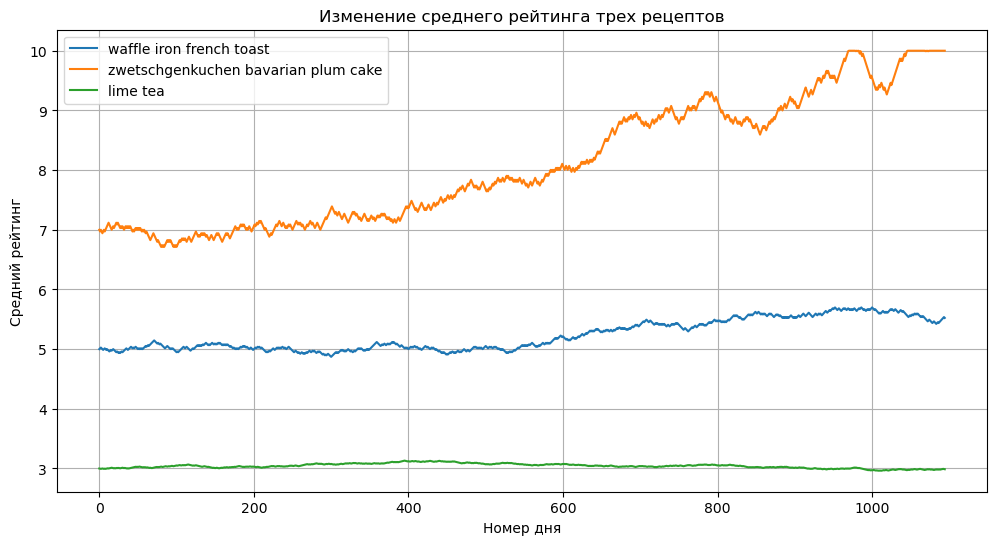

In [7]:
average_ratings_uploaded = np.load('average_ratings.npy')

days_uploaded = np.arange(average_ratings_uploaded.shape[1])  # Создаем массив с номерами дней

recipes_uploaded = [
    "waffle iron french toast",
    "zwetschgenkuchen bavarian plum cake",
    "lime tea"
]

plt.figure(figsize=(12, 6))
for index, recipe in enumerate(recipes_uploaded):
    plt.plot(days_uploaded, average_ratings_uploaded[index], label=recipe)

plt.title("Изменение среднего рейтинга трех рецептов")
plt.xlabel("Номер дня")
plt.ylabel("Средний рейтинг")
plt.legend()

plt.grid(True)
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


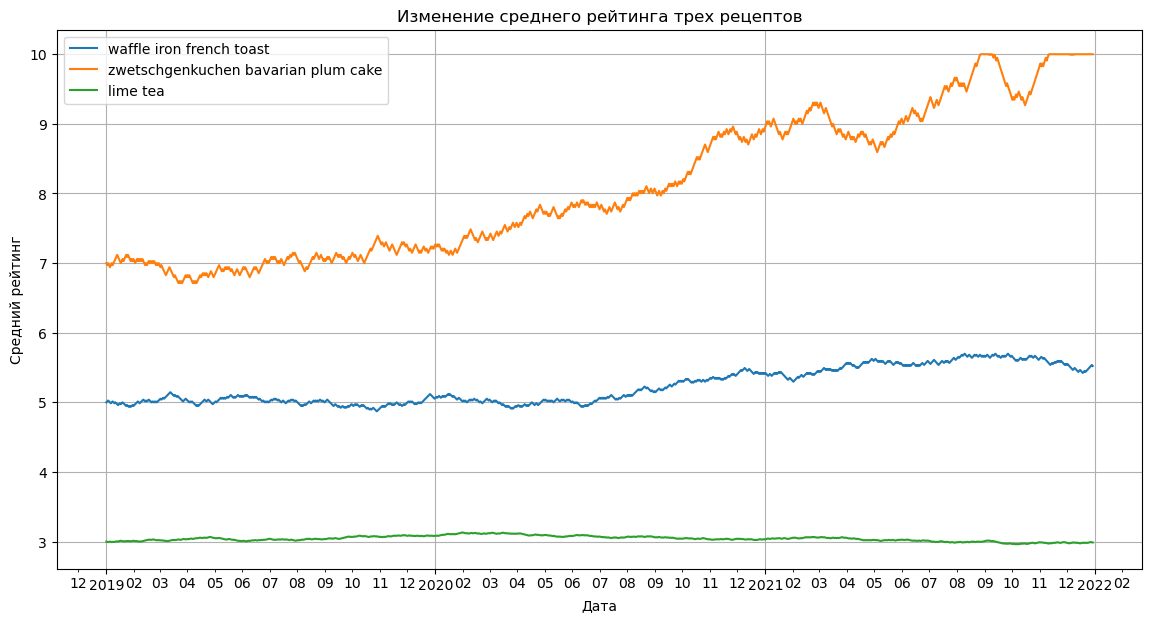

In [8]:
import matplotlib.dates as mdates

# Создание диапазона дат
dates = pd.date_range(start='2019-01-01', end='2021-12-30')

# Создание графика с датами на оси X
plt.figure(figsize=(14, 7))
for index, recipe in enumerate(recipes_uploaded):
    plt.plot(dates, average_ratings_uploaded[index], label=recipe)

# Форматирование оси времени
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

# Установка меток и сетки
plt.xlabel("Дата")
plt.ylabel("Средний рейтинг")
plt.title("Изменение среднего рейтинга трех рецептов")
plt.legend()
plt.grid(True)
plt.show()


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

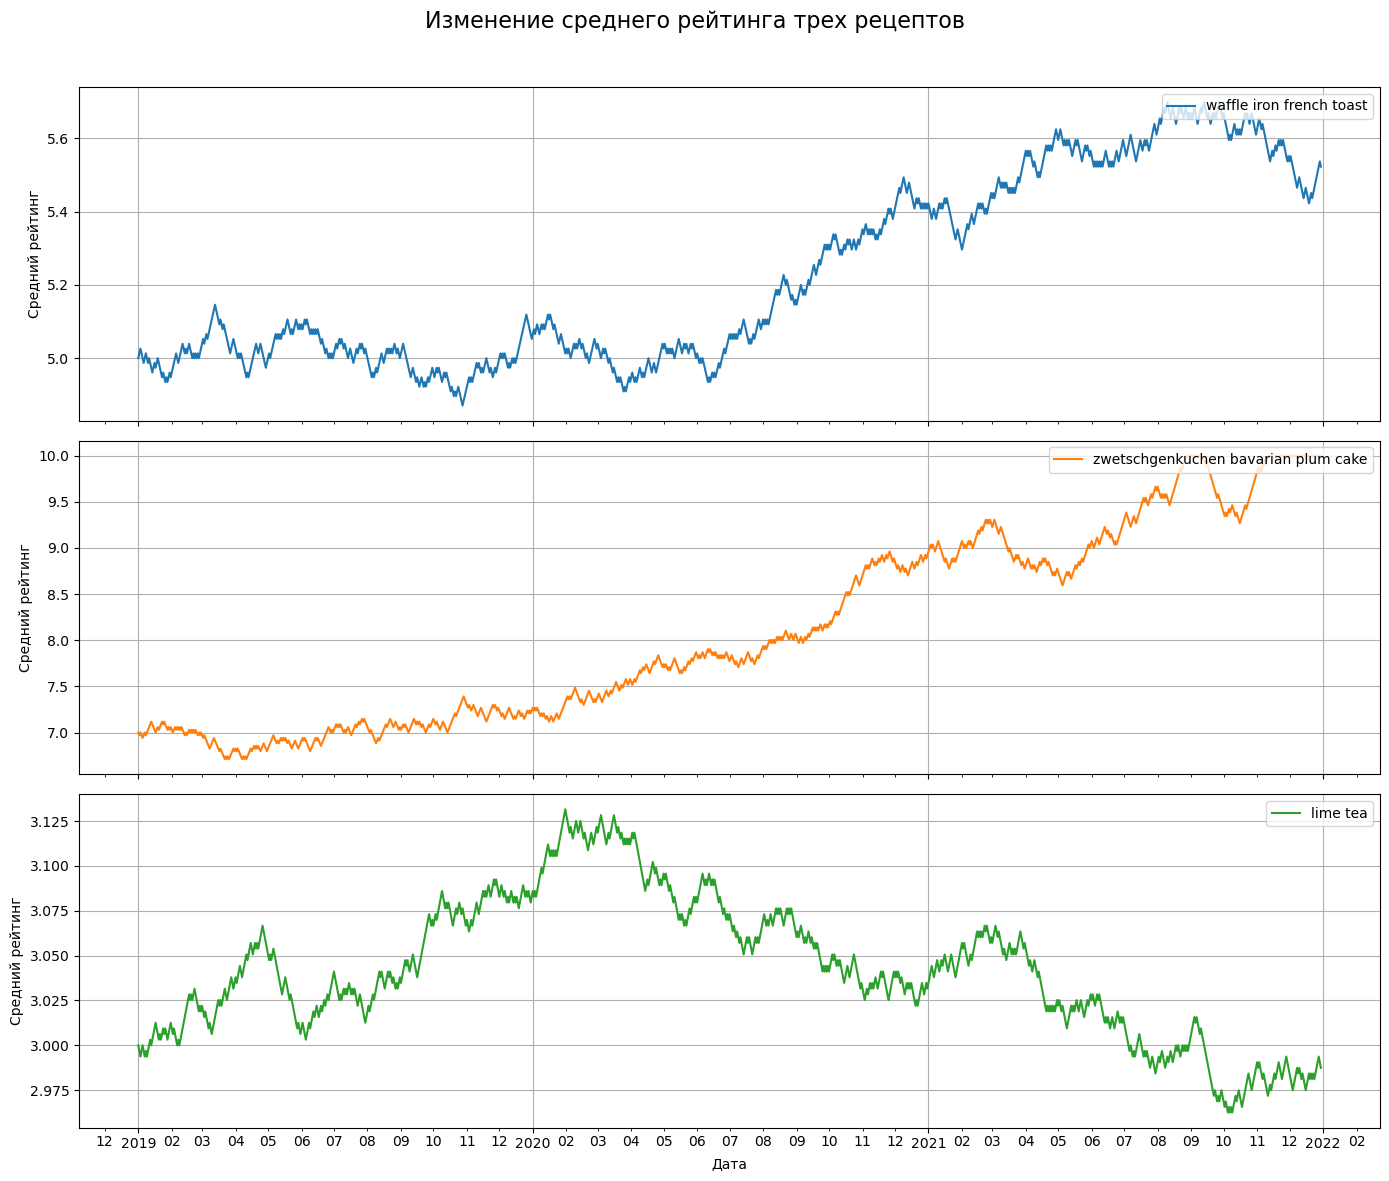

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), sharex=True)  # sharex используется для общей оси X

# Построение графиков для каждого рецепта
for i, ax in enumerate(axes):
    ax.plot(dates, average_ratings_uploaded[i], label=recipes_uploaded[i], color=plt.cm.tab10(i))
    ax.legend(loc='upper right')
    ax.set_ylabel("Средний рейтинг")
    ax.grid(True)

axes[-1].xaxis.set_major_locator(mdates.YearLocator())
axes[-1].xaxis.set_minor_locator(mdates.MonthLocator())
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[-1].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

axes[-1].set_xlabel("Дата")

# Добавление общего заголовка
plt.suptitle("Изменение среднего рейтинга трех рецептов", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Настройка layout с учетом suptitle

plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


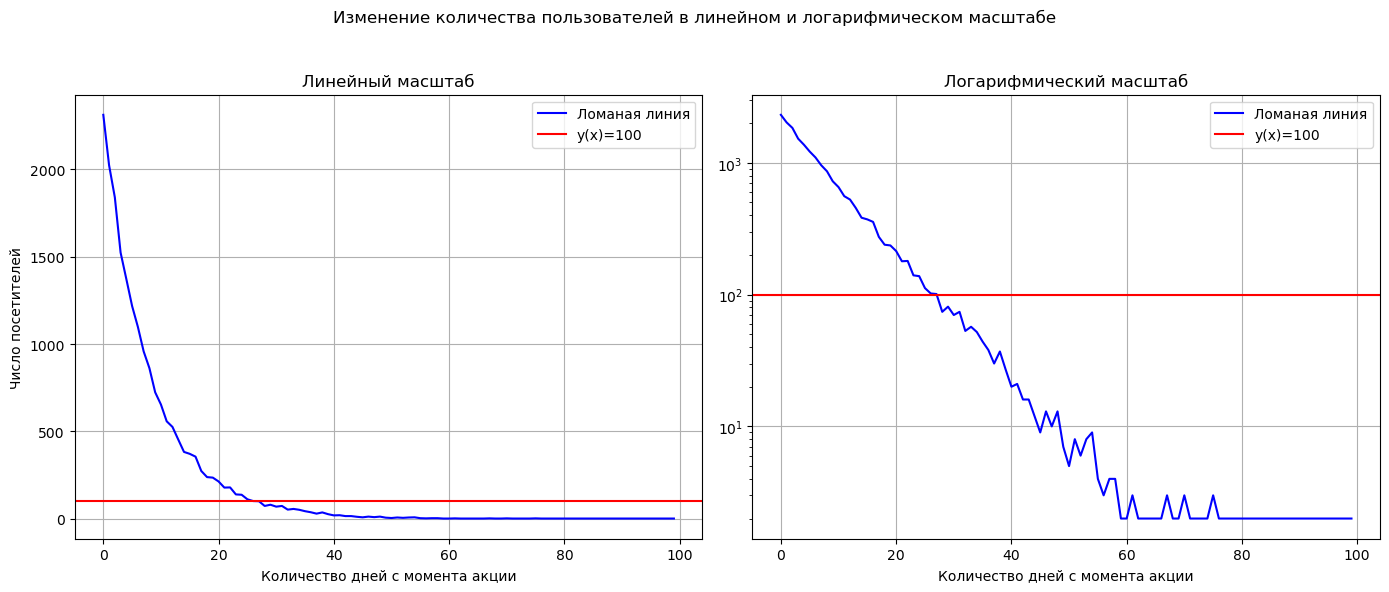

In [10]:
visitors = np.load('visitors.npy')

# Подготовка данных для визуализации
days = np.arange(len(visitors))  # массив с номерами дней

# Создание графика с двумя подграфиками (subplots) рядом по горизонтали
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=False)

# Линейный масштаб
axes[0].plot(days, visitors, label='Ломаная линия', color='blue')
axes[0].axhline(100, color='red', label='y(x)=100')
axes[0].set_title("Линейный масштаб")
axes[0].set_xlabel("Количество дней с момента акции")
axes[0].set_ylabel("Число посетителей")
axes[0].grid(True)
axes[0].legend()

# Логарифмический масштаб
axes[1].plot(days, visitors, label='Ломаная линия', color='blue')
axes[1].axhline(100, color='red', label='y(x)=100')
axes[1].set_yscale('log')
axes[1].set_title("Логарифмический масштаб")
axes[1].set_xlabel("Количество дней с момента акции")
axes[1].grid(True)
axes[1].legend()

# Общий заголовок
plt.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")

# Отображение графика
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Настройка layout с учетом suptitle
plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [12]:
recipes_df = pd.read_csv('recipes_sample (2).csv')
reviews_df = pd.read_csv('reviews_sample (2).csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

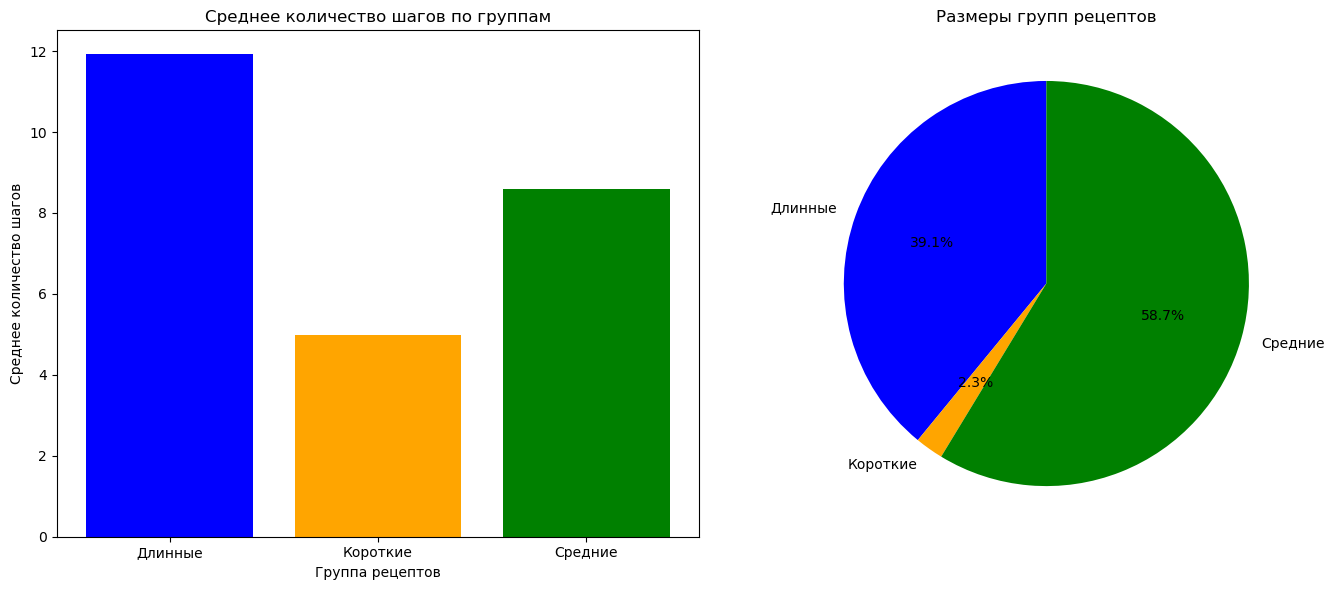

In [13]:
# Определение групп рецептов по времени приготовления
conditions = [
    (recipes_df['minutes'] < 5),
    (recipes_df['minutes'] >= 5) & (recipes_df['minutes'] < 50),
    (recipes_df['minutes'] >= 50)
]
choices = ['Короткие', 'Средние', 'Длинные']
recipes_df['duration_group'] = np.select(conditions, choices, default='Unknown')

# Группировка по новому признаку и вычисление среднего количества шагов и размера группы
grouped = recipes_df.groupby('duration_group').agg(
    avg_steps=('n_steps', 'mean'),
    group_size=('id', 'size')
).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(grouped['duration_group'], grouped['avg_steps'], color=['blue', 'orange', 'green'])
ax[0].set_title("Среднее количество шагов по группам")
ax[0].set_xlabel("Группа рецептов")
ax[0].set_ylabel("Среднее количество шагов")

ax[1].pie(grouped['group_size'], labels=grouped['duration_group'], autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green'])
ax[1].set_title("Размеры групп рецептов")

plt.tight_layout()
plt.show()


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

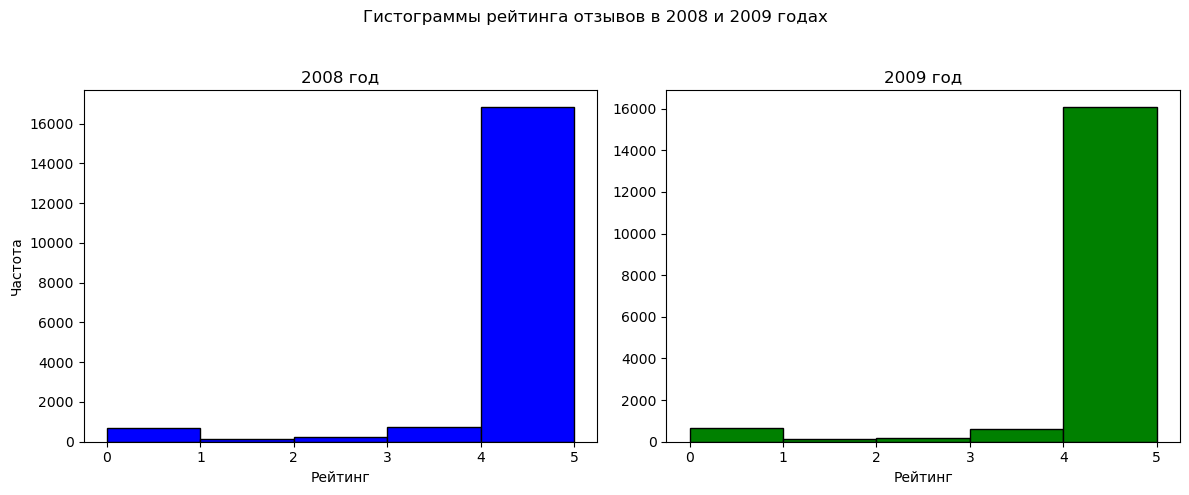

In [14]:
# Преобразование столбца дат в формат datetime и фильтрация отзывов за 2008 и 2009 годы
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
filtered_reviews = reviews_df[(reviews_df['date'].dt.year == 2008) | (reviews_df['date'].dt.year == 2009)]

# Разделение данных по годам
reviews_2008 = filtered_reviews[filtered_reviews['date'].dt.year == 2008]['rating']
reviews_2009 = filtered_reviews[filtered_reviews['date'].dt.year == 2009]['rating']

# Создание гистограмм
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма для 2008 года
reviews_2008.plot.hist(ax=ax[0], bins=5, edgecolor='black', color='blue')
ax[0].set_title("2008 год")
ax[0].set_xlabel("Рейтинг")
ax[0].set_ylabel("Частота")

# Гистограмма для 2009 года
reviews_2009.plot.hist(ax=ax[1], bins=5, edgecolor='black', color='green')
ax[1].set_title("2009 год")
ax[1].set_xlabel("Рейтинг")
ax[1].set_ylabel("")

# Общая подпись для рисунка
fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

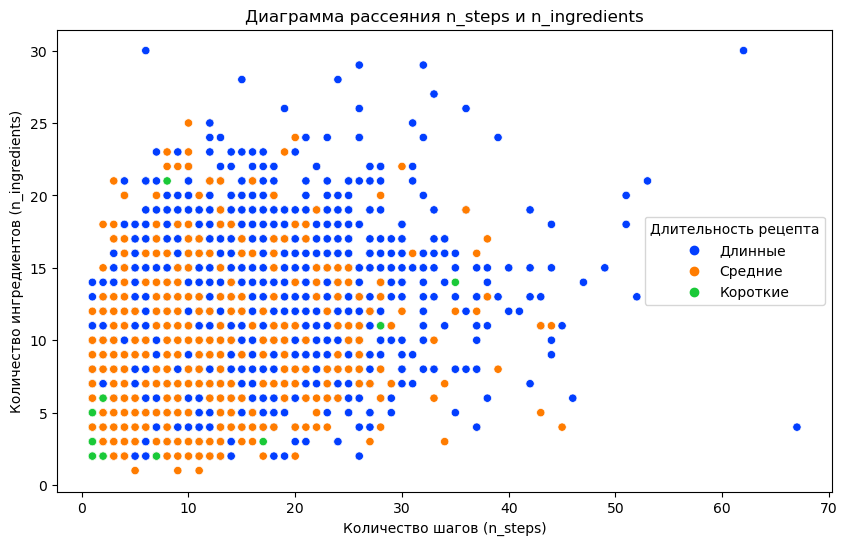

In [15]:
import seaborn as sns

# Создание диаграммы рассеяния с использованием seaborn
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=recipes_df, x='n_steps', y='n_ingredients', hue='duration_group', palette='bright')
scatter_plot.set_title("Диаграмма рассеяния n_steps и n_ingredients")
scatter_plot.set_xlabel("Количество шагов (n_steps)")
scatter_plot.set_ylabel("Количество ингредиентов (n_ingredients)")
plt.legend(title='Длительность рецепта')
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

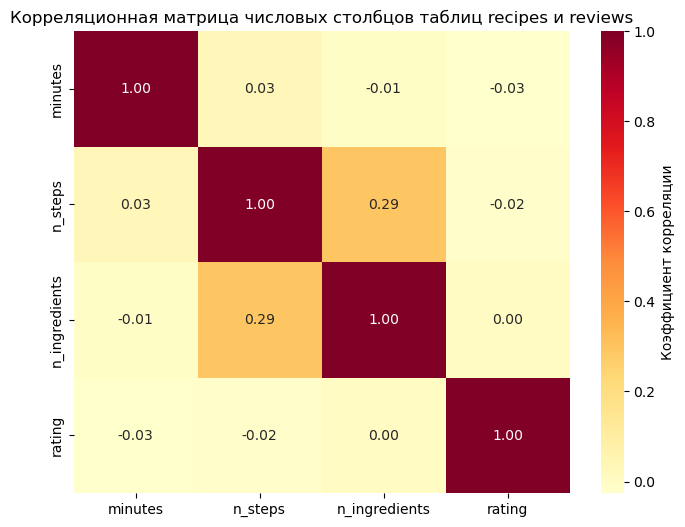

In [16]:
# Объединение таблиц recipes и reviews по столбцу id и recipe_id соответственно
combined_df = pd.merge(recipes_df, reviews_df, left_on='id', right_on='recipe_id')

# Выборка необходимых столбцов для анализа
correlation_data = combined_df[['minutes', 'n_steps', 'n_ingredients', 'rating']]

# Расчет корреляционной матрицы
correlation_matrix = correlation_data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlOrRd', cbar_kws={'label': 'Коэффициент корреляции'})
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")
plt.show()
